## Analytic Analysis Of Current State of Corona 2020
### Sourced from the CSSEGISandData

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd

In [6]:
! wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-13-2020.csv

--2020-05-14 10:27:04--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-13-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9420 (9.2K) [text/plain]
Saving to: ‘05-13-2020.csv.1’

05-13-2020.csv.1    100%[===================>]   9.20K  --.-KB/s    in 0.003s  

2020-05-14 10:27:04 (3.05 MB/s) - ‘05-13-2020.csv.1’ saved [9420/9420]



In [7]:
! wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2020-05-14 10:27:04--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102704 (100K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv.1’

time_series_covid19 100%[===================>] 100.30K  --.-KB/s    in 0.04s   

2020-05-14 10:27:04 (2.26 MB/s) - ‘time_series_covid19_confirmed_global.csv.1’ saved [102704/102704]



In [8]:
! wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

--2020-05-14 10:27:04--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77912 (76K) [text/plain]
Saving to: ‘time_series_covid19_deaths_global.csv.1’

time_series_covid19 100%[===================>]  76.09K  --.-KB/s    in 0.03s   

2020-05-14 10:27:05 (2.29 MB/s) - ‘time_series_covid19_deaths_global.csv.1’ saved [77912/77912]



In [9]:
! wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

--2020-05-14 10:27:05--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86650 (85K) [text/plain]
Saving to: ‘time_series_covid19_recovered_global.csv.1’

time_series_covid19 100%[===================>]  84.62K  --.-KB/s    in 0.04s   

2020-05-14 10:27:05 (1.97 MB/s) - ‘time_series_covid19_recovered_global.csv.1’ saved [86650/86650]



In [3]:
daily_reports = pd.read_csv('05-13-2020.csv')
recovered_reports = pd.read_csv('time_series_covid19_recovered_global.csv')
death_reports = pd.read_csv('time_series_covid19_deaths_global.csv')
confirmed_reprts = pd.read_csv('time_series_covid19_confirmed_global.csv')

# Basic Analysis on Indivual Data

## daily_reports

In [4]:
daily_reports.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-14 03:32:32,32.3182,-86.9023,10700,450,NaN,10250.0,1,228.198657,136372.0,1317.0,4.205607,84000001,USA,2908.402552,12.308411
1,Alaska,US,2020-05-14 03:32:32,61.3707,-152.4044,383,10,338.0,35.0,2,64.073717,30649.0,NaN,2.610966,84000002,USA,5127.402973,NaN
2,American Samoa,US,2020-05-14 03:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,105.0,NaN,NaN,16,ASM,188.709764,NaN
3,Arizona,US,2020-05-14 03:32:32,33.7298,-111.4312,12216,595,2979.0,8642.0,4,167.831776,127750.0,1590.0,4.870661,84000004,USA,1755.117008,13.015717
4,Arkansas,US,2020-05-14 03:32:32,34.9697,-92.3731,4236,97,3220.0,919.0,5,163.613589,73215.0,497.0,2.289896,84000005,USA,2827.896349,11.732767


In [5]:
daily_reports.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-14 03:32:32,37.7693,-78.1700,26746,928,3554.0,22264.0,51,338.247401,161392.0,5080.0,3.469678,84000051,USA,2041.068743,18.993494
54,Washington,US,2020-05-14 03:32:32,47.4009,-121.4905,17512,974,NaN,16538.0,53,231.965362,256321.0,NaN,5.561900,84000053,USA,3395.248604,NaN
55,West Virginia,US,2020-05-14 03:32:32,38.4912,-80.9545,1398,58,813.0,527.0,54,105.669094,66680.0,NaN,4.148784,84000054,USA,5040.068088,NaN
56,Wisconsin,US,2020-05-14 03:32:32,44.2685,-89.6165,10902,421,5673.0,4808.0,55,210.684132,128013.0,1908.0,3.861677,84000055,USA,2473.886241,17.501376
57,Wyoming,US,2020-05-14 03:32:32,42.7560,-107.3025,688,7,477.0,204.0,56,138.363768,15059.0,67.0,1.017442,84000056,USA,3028.517416,9.738372


In [6]:
daily_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [7]:
daily_reports.shape

(58, 18)

## recovered_reports

In [8]:
recovered_reports.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,397,421,458,468,472,502,558,558,610,648
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,543,570,595,605,620,627,650,654,682,688
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,499,514,521,526,537,545,550,550,568,576
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,11,13,13,13,13,14


In [9]:
recovered_reports.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
recovered_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 117 entries, Province/State to 5/13/20
dtypes: float64(2), int64(113), object(2)
memory usage: 231.4+ KB


In [11]:
recovered_reports.shape

(253, 117)

## death_reports

In [12]:
death_reports.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,90,95,104,106,109,115,120,122,127,132
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,465,470,476,483,488,494,502,507,515,522
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,45,46,46,47,47,48,48,48,48,49
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [13]:
death_reports.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,3,3,3,4,5,5,5,5,5,6
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2,4,5,5,7,7,8,9,10,12
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
265,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,3,5,8,12,12,20,20,21,21,23
266,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
death_reports.shape

(267, 117)

In [15]:
death_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 117 entries, Province/State to 5/13/20
dtypes: float64(2), int64(113), object(2)
memory usage: 244.2+ KB


# Data Clean UP

## Add Status Column if merge was considred to produce visulization

In [16]:
confirmed_reprts['Status'] = 'CONFIRMED'
recovered_reports['Status'] = 'RECOVERED'
death_reports['Status'] = 'DEAD'

## Lat and Long is not needed

In [17]:
confirmed = confirmed_reprts.drop(columns=['Lat', 'Long'])
death = death_reports.drop(columns=['Lat', 'Long'])
recovered = recovered_reports.drop(columns=['Lat', 'Long'])

## Not localizing Data so removed Province as well

In [18]:
nl_confirmed = confirmed.drop(columns=['Province/State'])
nl_death = death.drop(columns=['Province/State'])
nl_recovered = recovered.drop(columns=['Province/State'])

### Review

In [19]:
nl_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,Status
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,3224,3392,3563,3778,4033,4402,4687,4963,5226,CONFIRMED
1,Albania,0,0,0,0,0,0,0,0,0,...,820,832,842,850,856,868,872,876,880,CONFIRMED
2,Algeria,0,0,0,0,0,0,0,0,0,...,4838,4997,5182,5369,5558,5723,5891,6067,6253,CONFIRMED
3,Andorra,0,0,0,0,0,0,0,0,0,...,751,751,752,752,754,755,755,758,760,CONFIRMED
4,Angola,0,0,0,0,0,0,0,0,0,...,36,36,36,43,43,45,45,45,45,CONFIRMED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,174,174,187,208,208,208,208,208,220,CONFIRMED
263,Yemen,0,0,0,0,0,0,0,0,0,...,22,25,25,34,34,51,56,65,70,CONFIRMED
264,Comoros,0,0,0,0,0,0,0,0,0,...,3,8,8,8,11,11,11,11,11,CONFIRMED
265,Tajikistan,0,0,0,0,0,0,0,0,0,...,293,379,461,522,612,612,661,729,801,CONFIRMED


In [20]:
nl_death

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,Status
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,95,104,106,109,115,120,122,127,132,DEAD
1,Albania,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,DEAD
2,Algeria,0,0,0,0,0,0,0,0,0,...,470,476,483,488,494,502,507,515,522,DEAD
3,Andorra,0,0,0,0,0,0,0,0,0,...,46,46,47,47,48,48,48,48,49,DEAD
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,DEAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,6,DEAD
263,Yemen,0,0,0,0,0,0,0,0,0,...,4,5,5,7,7,8,9,10,12,DEAD
264,Comoros,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,DEAD
265,Tajikistan,0,0,0,0,0,0,0,0,0,...,5,8,12,12,20,20,21,21,23,DEAD


In [21]:
nl_recovered

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,Status
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,RECOVERED
1,Albania,0,0,0,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,RECOVERED
2,Algeria,0,0,0,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,RECOVERED
3,Andorra,0,0,0,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,RECOVERED
4,Angola,0,0,0,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,RECOVERED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,RECOVERED
249,Yemen,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,RECOVERED
250,Comoros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RECOVERED
251,Tajikistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RECOVERED


## Find any cases from 1/22/20 to Present to clean the data

In [22]:
print(f' CONFIRMED |1/22/20: {sum(nl_confirmed["1/22/20"].tolist())} -> 5/13/20: {sum(nl_confirmed["5/13/20"].tolist())}')
print(f' DEATH     |1/22/20: {sum(nl_death["1/22/20"].tolist())}  -> 5/13/20: {sum(nl_death["5/13/20"].tolist())}')
print(f' RECOVERED |1/22/20: {sum(nl_recovered["1/22/20"].tolist())}  -> 5/13/20: {sum(nl_recovered["5/13/20"].tolist())}')

 CONFIRMED |1/22/20: 555 -> 5/13/20: 4347018
 DEATH     |1/22/20: 17  -> 5/13/20: 297197
 RECOVERED |1/22/20: 28  -> 5/13/20: 1548547


## FInished data cleaning time to merge all resuls

In [23]:
corona_cases = pd.concat([nl_recovered, nl_death, nl_confirmed])

In [24]:
## Final stats
cols = list(corona_cases)
cols.insert(1, cols.pop(cols.index('Status')))
corona = corona_cases.loc[:, cols]

In [25]:
corona_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,Status
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,RECOVERED
1,Albania,0,0,0,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,RECOVERED
2,Algeria,0,0,0,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,RECOVERED
3,Andorra,0,0,0,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,RECOVERED
4,Angola,0,0,0,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,RECOVERED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,174,174,187,208,208,208,208,208,220,CONFIRMED
263,Yemen,0,0,0,0,0,0,0,0,0,...,22,25,25,34,34,51,56,65,70,CONFIRMED
264,Comoros,0,0,0,0,0,0,0,0,0,...,3,8,8,8,11,11,11,11,11,CONFIRMED
265,Tajikistan,0,0,0,0,0,0,0,0,0,...,293,379,461,522,612,612,661,729,801,CONFIRMED


In [26]:
## Create a list of unique countries

In [27]:
corona_cases.applymap(lambda x: isinstance(x, list)).all()

Country/Region    False
1/22/20           False
1/23/20           False
1/24/20           False
1/25/20           False
                  ...  
5/10/20           False
5/11/20           False
5/12/20           False
5/13/20           False
Status            False
Length: 115, dtype: bool

In [28]:
unique_countries = set(corona_cases['Country/Region'].tolist())

## Make data cleaner with a group by method

In [29]:
corona_group = corona.loc[:, cols].groupby(["Country/Region", "Status"]).sum()
corona_group.loc[:, ::-1]

5/13/20  5/12/20  5/11/20  5/10/20  5/9/20  5/8/20  \
Country/Region Status                                                          
Afghanistan    CONFIRMED     5226     4963     4687     4402    4033    3778   
               DEAD           132      127      122      120     115     109   
               RECOVERED      648      610      558      558     502     472   
Albania        CONFIRMED      880      876      872      868     856     850   
               DEAD            31       31       31       31      31      31   
...                           ...      ...      ...      ...     ...     ...   
Zambia         DEAD             7        7        7        7       7       4   
               RECOVERED      124      117      117      117     112     111   
Zimbabwe       CONFIRMED       37       36       36       36      35      34   
               DEAD             4        4        4        4       4       4   
               RECOVERED       12        9        9        9       9       9   

                          5/7/20  5/6/20  5/5/20  5/4/20  ...  1/31/20  \
Country/Region Status                                     ...            
Afghanistan    CONFIRMED    3563    3392    3224    2894  ...        0   
               DEAD          106     104      95      90  ...        0   
               RECOVERED     468     458     421     397  ...        0   
Albania        CONFIRMED     842     832     820     803  ...        0   
               DEAD           31      31      31      31  ...        0   
...                          ...     ...     ...     ...  ...      ...   
Zambia         DEAD            4       4       3       3  ...        0   
               RECOVERED     103     101      92      78  ...        0   
Zimbabwe       CONFIRMED      34      34      34      34  ...        0   
               DEAD            4       4       4       4  ...        0   
               RECOVERED       5       5       5       5  ...        0   

                          1/30/20  1/29/20  1/28/20  1/27/20  1/26/20  \
Country/Region Status                                                   
Afghanistan    CONFIRMED        0        0        0        0        0   
               DEAD             0        0        0        0        0   
               RECOVERED        0        0        0        0        0   
Albania        CONFIRMED        0        0        0        0        0   
               DEAD             0        0        0        0        0   
...                           ...      ...      ...      ...      ...   
Zambia         DEAD             0        0        0        0        0   
               RECOVERED        0        0        0        0        0   
Zimbabwe       CONFIRMED        0        0        0        0        0   
               DEAD             0        0        0        0        0   
               RECOVERED        0        0        0        0        0   

                          1/25/20  1/24/20  1/23/20  1/22/20  
Country/Region Status                                         
Afghanistan    CONFIRMED        0        0        0        0  
               DEAD             0        0        0        0  
               RECOVERED        0        0        0        0  
Albania        CONFIRMED        0        0        0        0  
               DEAD             0        0        0        0  
...                           ...      ...      ...      ...  
Zambia         DEAD             0        0        0        0  
               RECOVERED        0        0        0        0  
Zimbabwe       CONFIRMED        0        0        0        0  
               DEAD             0        0        0        0  
               RECOVERED        0        0        0        0  

[564 rows x 113 columns]

## Lets Checkout the top4 infected places

In [31]:
Spain_Stats = corona_group.loc['Spain']
Italy_Stats = corona_group.loc['Italy']
China_stats = corona_group.loc['China']
US_Stats = corona_group.loc['US']

In [32]:
def rid_rates(location):
    '''
    takes a location 3 part cases and splits it to individual rates
    '''
    confirmed = location.loc['CONFIRMED']
    deaths = location.loc['DEAD']
    recovery = location.loc['RECOVERED']
    
    infection_rate = []
    death_rate = []
    recovery_rate = []
    
    for i in range(0, len(confirmed)-1):
        infection_rate.append(confirmed.iloc[i + 1] - confirmed.iloc[i])
        death_rate.append(deaths.iloc[i + 1] - deaths.iloc[i])
        recovery_rate.append(recovery.iloc[i + 1] - recovery.iloc[i])
                             
    return recovery_rate, death_rate, infection_rate

In [33]:
spain_rec, spain_de, spain_inf = rid_rates(Spain_Stats)

In [34]:
def rid_subplot_stats(country):
    '''
    takes a whole statistical data and a function for rid rates
    '''
    country_stats = corona_group.loc[country]
    recovery, death, infection = rid_rates(country_stats)
    fig, axs = plt.subplots(4, figsize=(20, 10), sharex=True)
    plt.xticks(rotation=90)
    
    # Inefection
    axs[0].plot(country_stats.columns[1:], infection, color='red')
    # Death
    axs[1].plot(country_stats.columns[1:], death, color='blue')
    # Recovery
    axs[2].plot(country_stats.columns[1:], recovery, color='green')
    
    axs[3].plot(country_stats.columns[1:], infection, color='red')
    axs[3].plot(country_stats.columns[1:], death, color='blue')
    axs[3].plot(country_stats.columns[1:], recovery, color='green')

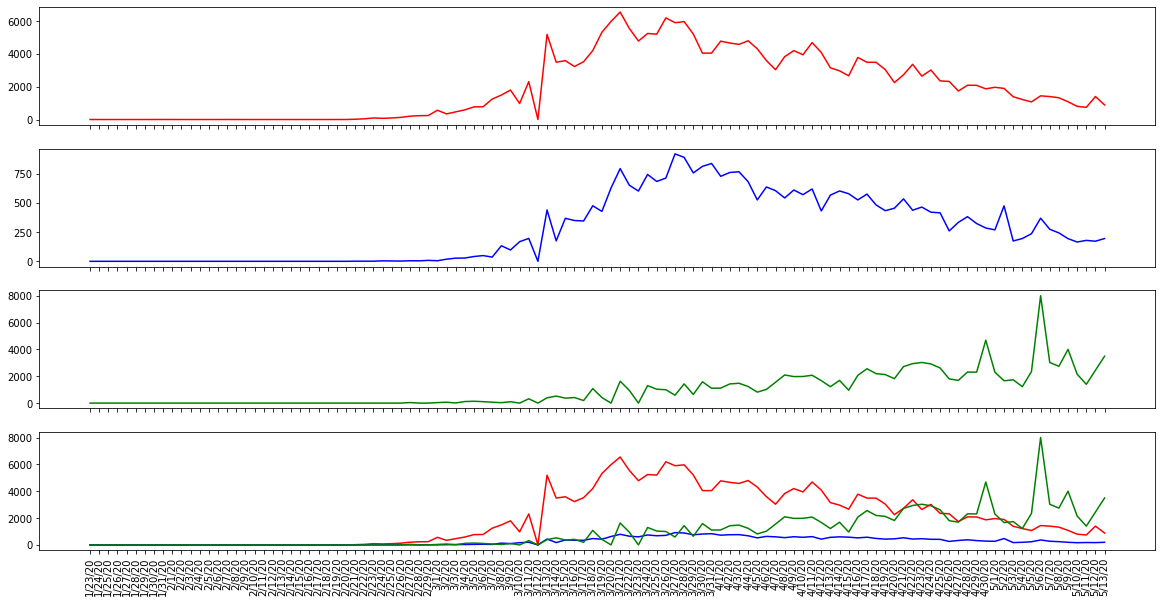

In [35]:
rid_subplot_stats('Italy') # IDR

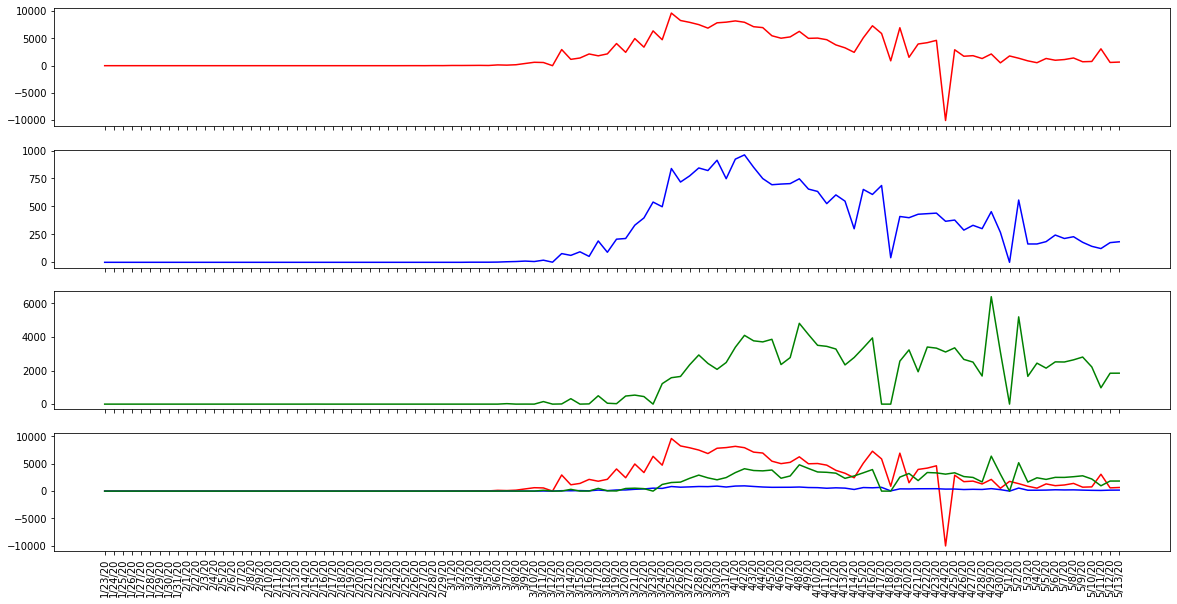

In [36]:
rid_subplot_stats('Spain') # IDR

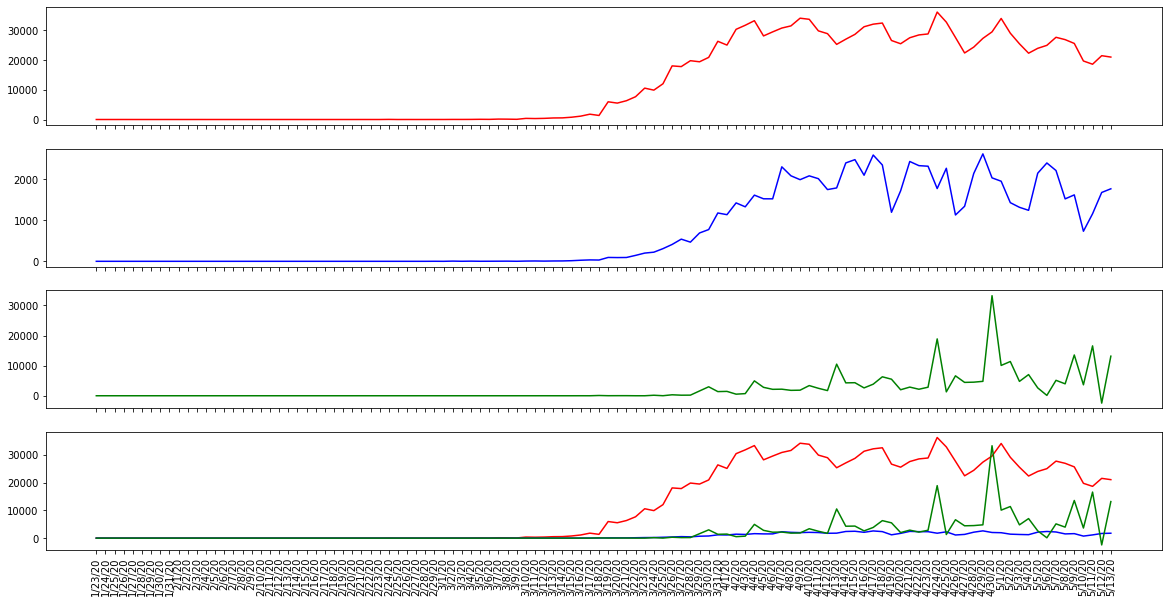

In [37]:
rid_subplot_stats('US') # IDR

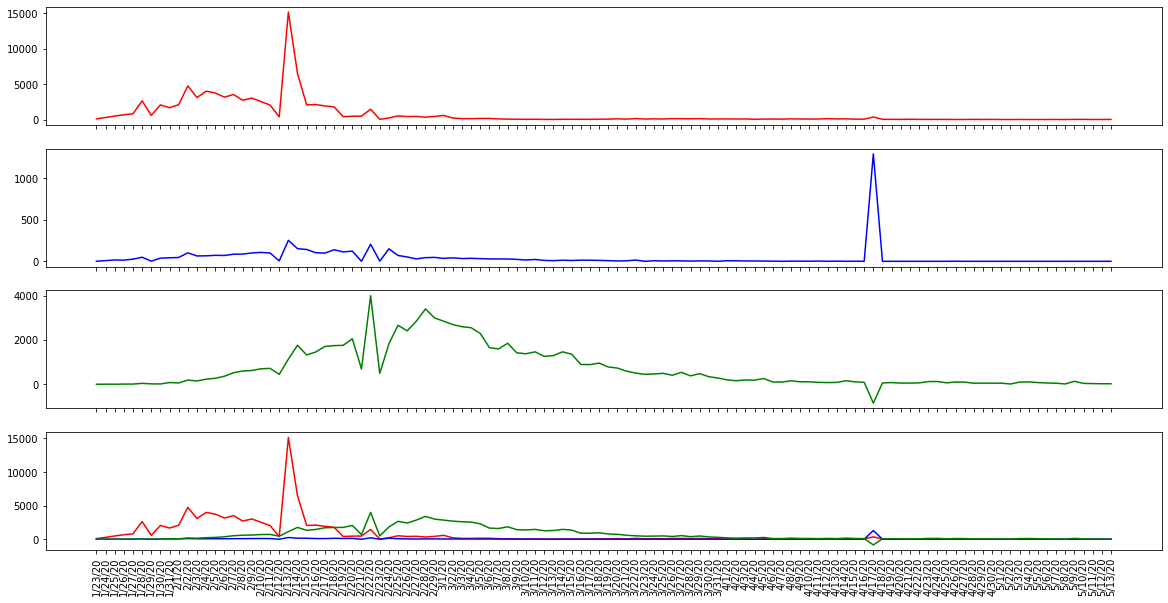

In [38]:
rid_subplot_stats('China') # IDR

In [44]:
unique_countries = list(unique_countries)
## Global Confirmes Cases paired to unique_countries
confirmed_cases_g = [corona_group.loc[x].loc['CONFIRMED'] for x in unique_countries]
## Global Dead Cases
dead_cases_g = [corona_group.loc[x].loc['DEAD'] for x in unique_countries]
## Global Recovered Cases
recovered_cases_g = [corona_group.loc[x].loc['RECOVERED'] for x in unique_countries]

In [43]:
dic_confirmed_g = {}
dic_dead_g = {}
dic_recovered_g = {}


for x in range(0,len(unique_countries)-1):
    dic_confirmed_g[unique_countries[x]] = confirmed_cases_g[x]
    dic_dead_g[unique_countries[x]] = dead_cases_g[x]
    dic_recovered_g[unique_countries[x]] = recovered_cases_g[x] 

In [42]:
def case_stats(country,beg=None,end=None,step=None ):
    return dic_confirmed_g[country][beg:end:step], dic_recovered_g[country][beg:end:step], dic_dead_g[country][beg:end:step]